In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import re
import matplotlib.pyplot as plt
from matplotlib import pyplot
import eelbrain
import mne
import trftools

from pprint import pprint
import numpy as np

In [3]:
## NATIVES ##

STIMULI = [str(i) for i in range(1, 13)]
DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
EEG_DIR = DATA_ROOT / 'EEG_Natives' / 'Alice_natives_ICAed_fif'
Native_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'S\d*', path.name)]
# Define a target directory for TRF estimates and make sure the directory is created
TRF_DIR = DATA_ROOT / 'TRFs_Natives'
TRF_DIR.mkdir(exist_ok=True)
print(Native_SUBJECTS)

['S13_Alice-natives_sfreq-100_raw.fif', 'S14_Alice-natives_sfreq-100_raw.fif', 'S12_Alice-natives_sfreq-100_raw.fif', 'S15_Alice-natives_sfreq-100_raw.fif', 'S11_Alice-natives_sfreq-100_raw.fif', 'S16_Alice-natives_sfreq-100_raw.fif', 'S17_Alice-natives_sfreq-100_raw.fif', 'S18_Alice-natives_sfreq-100_raw.fif', 'S19_Alice-natives_sfreq-100_raw.fif', 'S20_Alice-natives_sfreq-100_raw.fif', 'S21_Alice-natives_sfreq-100_raw.fif', 'S01_Alice-natives_sfreq-100_raw.fif', 'S03_Alice-natives_sfreq-100_raw.fif', 'S04_Alice-natives_sfreq-100_raw.fif', 'S05_Alice-natives_sfreq-100_raw.fif', 'S06_Alice-natives_sfreq-100_raw.fif', 'S08_Alice-natives_sfreq-100_raw.fif', 'S10_Alice-natives_sfreq-100_raw.fif', 'S22_Alice-natives_sfreq-100_raw.fif', 'S25_Alice-natives_sfreq-100_raw.fif', 'S26_Alice-natives_sfreq-100_raw.fif', 'S34_Alice-natives_sfreq-100_raw.fif', 'S35_Alice-natives_sfreq-100_raw.fif', 'S36_Alice-natives_sfreq-100_raw.fif', 'S37_Alice-natives_sfreq-100_raw.fif', 'S38_Alice-natives_sfreq

## Natives Auditory TRFs

##### Pre-define models here to have easier access during estimation. In the future, additional models could be added here and the script re-run to generate additional TRFs.
    models = {
        # Acoustic models
        'envelope': [envelope],
        'envelope+onset': [envelope, onset_envelope],
        'acoustic': [gammatone, gammatone_onsets],
        
        # Models with word-onsets and word-class
        'words': [word_onsets],
        'words+lexical': [word_onsets, word_lexical, word_nlexical],  # covariant model
        'acoustic+words': [gammatone, gammatone_onsets, word_onsets],
        'acoustic+words+lexical': [gammatone, gammatone_onsets, word_onsets, word_lexical, word_nlexical],
        
        # Language Models
        'Ngram': [word_Ngram, word_onsets, word_lexical, word_nlexical],
        'CFG': [word_CFG, word_onsets, word_lexical, word_nlexical],
        'Ngram-CFG_all': [word_Ngram, word_CFG, word_onsets, word_lexical, word_nlexical]
    }
m = covar  
m1 = covar + Ngram  
m2 = covar + CFG  
m3 = covar + Ngram + CFG  

[['13', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['14', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['12', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['15', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['11', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['16', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['17', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['18', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['19', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['20', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['21', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['01', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['03', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['04', <NDVar '1': 59 sensor>, <NDVar

"\n# USELESS PIC\ntrf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif acoustic.pickle'%(subj, subj)))\ntrf_sensor = trf.proportion_explained\nprint(trf_sensor)\nprint(trf.h[0].shape)\n\n#print(type(trf.h))\n#plt.plot(trf.h[:,0,:])\np = eelbrain.plot.TopoButterfly(trf.h[0], w=6, h=5)\n\n#p = eelbrain.plot.TopoButterfly(trf.h[0], w=10, h=4, sensors=trf_sensor)\n#p.set_time(.180)\n"

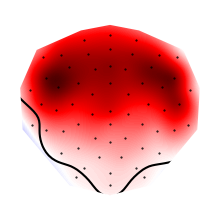

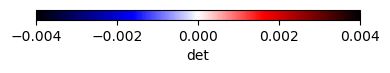

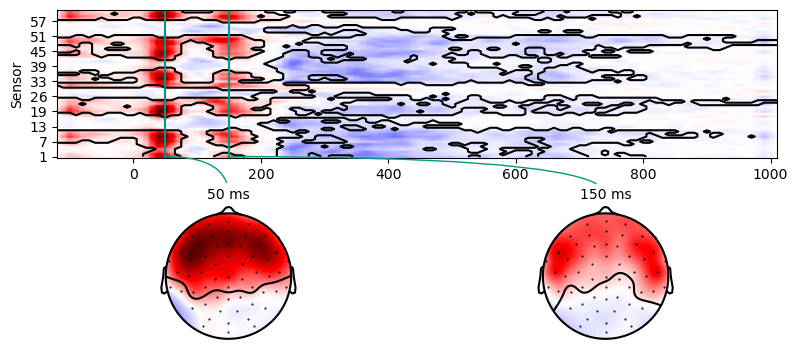

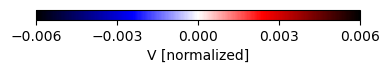

In [6]:
## TRF: envelope ##
n_rowsLIST = []
    
for subj in Native_SUBJECTS:
    trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif envelope.pickle'%(int(subj[1:3]), int(subj[1:3]))))
    n_rowsLIST.append([subj[1:3], trf.proportion_explained, trf.h[0]])#.abs()])
data_env = eelbrain.Dataset.from_caselist(['subject', 'det', 'trf'], n_rowsLIST)
pprint(n_rowsLIST)
print(data_env)


#test that model predictive power on held-out data is > 0
test_envelope = eelbrain.testnd.TTestOneSample('det', ds=data_env, tail=1, pmin=0.05)
p = eelbrain.plot.Topomap(test_envelope)
cb = p.plot_colorbar(width=0.1)


# ## Envelope TRF
# Test the TRF with a one-sample *t*-test against 0. This tests the null-hypothesis that the electrical current direction at each time point was random across subjects. The systematic current directions shown below at anterior electrodes are typical of auditory responses. 

trf_envelope = eelbrain.testnd.TTestOneSample('trf', ds=data_env, pmin=0.05)

p = eelbrain.plot.TopoArray(trf_envelope,t=[0.05, 0.15], clip='circle', cmap='xpolar', h=4, w=8) #, t=[0.08, 0.16, 0.22, 0.45]
cb = p.plot_colorbar(width=0.1)

p.save(TRF_DIR / 'Natives_envelope-TRFs.png')

"""
# USELESS PIC
trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif acoustic.pickle'%(subj, subj)))
trf_sensor = trf.proportion_explained
print(trf_sensor)
print(trf.h[0].shape)

#print(type(trf.h))
#plt.plot(trf.h[:,0,:])
p = eelbrain.plot.TopoButterfly(trf.h[0], w=6, h=5)

#p = eelbrain.plot.TopoButterfly(trf.h[0], w=10, h=4, sensors=trf_sensor)
#p.set_time(.180)
"""

<class 'eelbrain.plot._topo.TopoArray'>


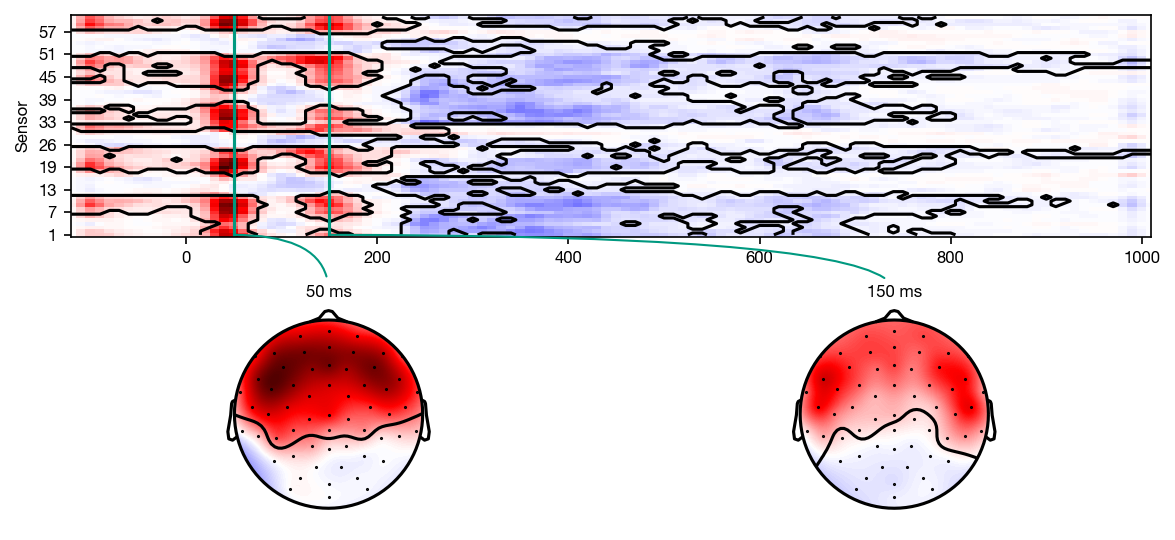

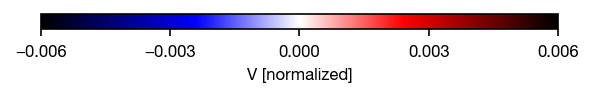

In [11]:
p = eelbrain.plot.TopoArray(trf_envelope,t=[0.05, 0.15], clip='circle', cmap='xpolar', h=4, w = 8) #, t=[0.08, 0.16, 0.22, 0.45]
cb = p.plot_colorbar(width=0.1)
print(type(p))
p.save(TRF_DIR / 'Natives_words-TRFs.png')

[['13',
  <NDVar '1': 59 sensor>,
  <NDVar 'envelope': 59 sensor, 114 time>,
  <NDVar 'onset': 59 sensor, 114 time>],
 ['14',
  <NDVar '1': 59 sensor>,
  <NDVar 'envelope': 59 sensor, 114 time>,
  <NDVar 'onset': 59 sensor, 114 time>],
 ['12',
  <NDVar '1': 59 sensor>,
  <NDVar 'envelope': 59 sensor, 114 time>,
  <NDVar 'onset': 59 sensor, 114 time>],
 ['15',
  <NDVar '1': 59 sensor>,
  <NDVar 'envelope': 59 sensor, 114 time>,
  <NDVar 'onset': 59 sensor, 114 time>],
 ['11',
  <NDVar '1': 59 sensor>,
  <NDVar 'envelope': 59 sensor, 114 time>,
  <NDVar 'onset': 59 sensor, 114 time>],
 ['16',
  <NDVar '1': 59 sensor>,
  <NDVar 'envelope': 59 sensor, 114 time>,
  <NDVar 'onset': 59 sensor, 114 time>],
 ['17',
  <NDVar '1': 59 sensor>,
  <NDVar 'envelope': 59 sensor, 114 time>,
  <NDVar 'onset': 59 sensor, 114 time>],
 ['18',
  <NDVar '1': 59 sensor>,
  <NDVar 'envelope': 59 sensor, 114 time>,
  <NDVar 'onset': 59 sensor, 114 time>],
 ['19',
  <NDVar '1': 59 sensor>,
  <NDVar 'envelope': 5

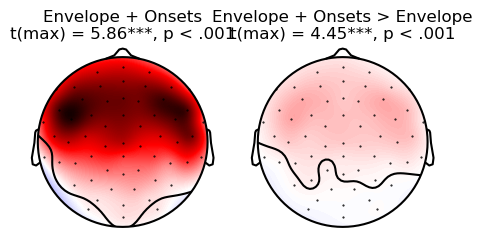

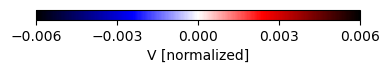

In [7]:
## TRF: envelope+onset ##
n_rowsLIST = []
    
for subj in Native_SUBJECTS:
    trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif envelope+onset.pickle'%(int(subj[1:3]), int(subj[1:3]))))
    n_rowsLIST.append([subj[1:3], trf.proportion_explained, *trf.h])#.abs()])
    x_names = trf.x
data_onset = eelbrain.Dataset.from_caselist(['subject', 'det', *x_names], n_rowsLIST)
pprint(n_rowsLIST)
print(data_onset)

test_onset = eelbrain.testnd.TTestOneSample('det', ds=data_onset, tail=1, pmin=0.05)
# Paired t-test by specifying two measurement NDVars with matched cases
# Note that this presupposes that subjects are in the same order
test_onset_envelope = eelbrain.testnd.TTestRelated(data_onset['det'], data_env['det'], tail=1, pmin=0.05)
p2 = eelbrain.plot.Topomap(
    [test_onset.masked_difference(), test_onset_envelope.masked_difference()], 
    axtitle=[['Envelope + Onsets\n', test_onset], ['Envelope + Onsets > Envelope\n', test_onset_envelope]],
    ncol=2, clip='circle')
cb = p.plot_colorbar(width=0.1)

trf_eo_envelope = eelbrain.testnd.TTestOneSample('envelope', ds=data_onset, pmin=0.05)
trf_eo_onset = eelbrain.testnd.TTestOneSample('onset', ds=data_onset, pmin=0.05)


p2.save(TRF_DIR / 'Natives_Envelope+onset-TRFs_topo.png')

[['13',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'gammatone_on': 59 sensor, 8 frequency, 114 time>],
 ['14',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'gammatone_on': 59 sensor, 8 frequency, 114 time>],
 ['12',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'gammatone_on': 59 sensor, 8 frequency, 114 time>],
 ['15',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'gammatone_on': 59 sensor, 8 frequency, 114 time>],
 ['11',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'gammatone_on': 59 sensor, 8 frequency, 114 time>],
 ['16',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'gammatone_on': 59 sensor, 8 frequency, 114 time>],
 ['17',
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time

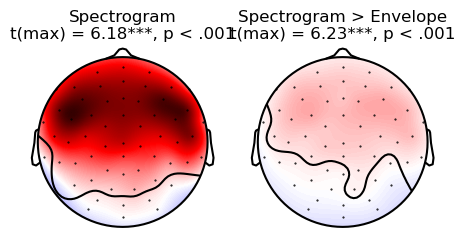

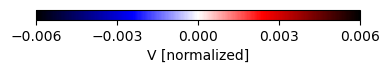

In [8]:
rows = []
x_names = None

n_rowsLIST = []
    
for subj in Native_SUBJECTS:
    trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif acoustic.pickle'%(int(subj[1:3]), int(subj[1:3]))))
    n_rowsLIST.append([subj[1:3], trf.proportion_explained, *trf.h])#.abs()])
    x_names = trf.x
data_acoustic = eelbrain.Dataset.from_caselist(['subject', 'det', *x_names], n_rowsLIST)
pprint(n_rowsLIST)
print(data_onset)

# Compare predictive power of the two models
test_acoustic = eelbrain.testnd.TTestOneSample('det', ds=data_acoustic, tail=1, pmin=0.05)
# Paired t-test by specifying two measurement NDVars with matched cases
# Note that this presupposes that subjects are in the same order
test_acoustic_onset = eelbrain.testnd.TTestRelated(data_acoustic['det'], data_onset['det'], tail=1, pmin=0.05)
p3 = eelbrain.plot.Topomap(
    [test_acoustic.masked_difference(), test_acoustic_onset.masked_difference()], 
    axtitle=[[['Spectrogram\n', test_acoustic], ], ['Spectrogram > Envelope\n', test_acoustic_onset]],
    ncol=2, clip='circle')
cb = p.plot_colorbar(width=0.1)

p3.save(TRF_DIR / 'Natives_acoustic-TRFs_topo.png')

<class 'eelbrain._data_obj.NDVar'>


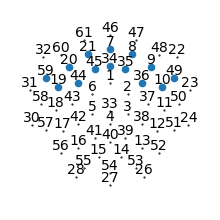

In [9]:
### LATER ANALYSIS  ###
# ## TRFs
# Since these spectrogram mTRFs have a frequency dimension in addition to time and sensor we have to slice or aggregate them for visualization on a 2d plot. We take two approaches: 
#
#  1) Sum across the frequency, based on the assumtopn that TRFs are similar for different frequency bands
#  2) Average across a group of neighboring sensors, to verify this assumtopn 

trf_spectrogram = eelbrain.testnd.TTestOneSample("gammatone.sum('frequency')", ds=data_acoustic, pmin=0.05)
trf_onset_spectrogram = eelbrain.testnd.TTestOneSample("gammatone_on.sum('frequency')", ds=data_acoustic, pmin=0.05)

#p4 = eelbrain.plot.TopoArray([trf_spectrogram, trf_onset_spectrogram], t=[0.050, 0.100, 0.150, 0.450], xlim=(-0.050, 0.950))

# Manually define sensors that are sensitive to acoustic responses 
auditory_sensors = ['59', '20', '21', '7', '8', '9', '49', '19' ,'44', '45', '34' ,'35' ,'36' ,'10']
p5 = eelbrain.plot.SensorMap(data_acoustic['det'], h=2, mark=auditory_sensors)

#strf_spectrogram = data_acoustic['gammatone'].mean(sensor=auditory_sensors).smooth('frequency', window_samples=7, fix_edges=True)
print(type(data_acoustic['gammatone'].mean(sensor=auditory_sensors)))
#strf_onset_spectrogram = data_acoustic['gammatone_on'].mean(sensor=auditory_sensors)
#p6 = eelbrain.plot.Array([strf_spectrogram, strf_onset_spectrogram], ncol=2, xlim=(-0.050, 0.950))


#p4.save(TRF_DIR / 'Natives_acoustic-TRFs_topo.png')
#p5.save(TRF_DIR / 'Natives_acoustic-TRFs_topo.png')
#p6.save(TRF_DIR / 'Natives_acoustic-TRFs_topo.png')

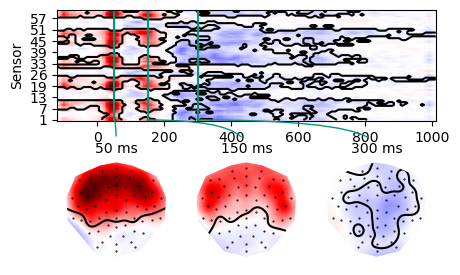

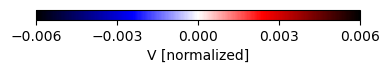

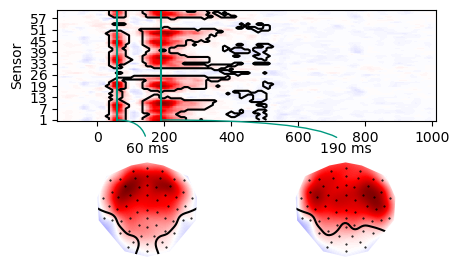

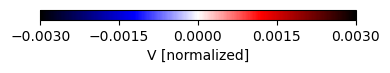

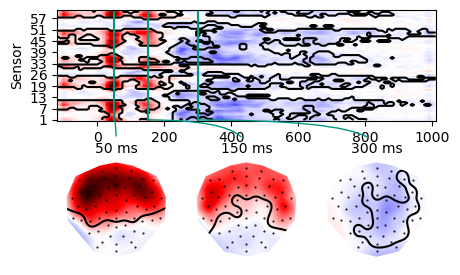

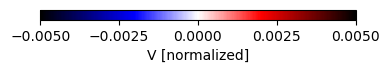

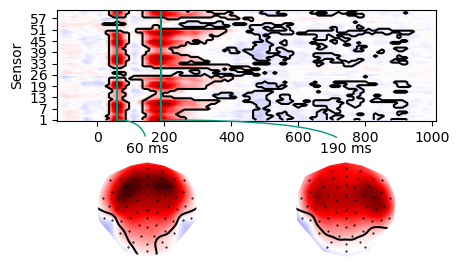

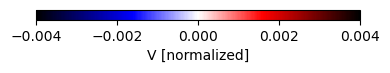

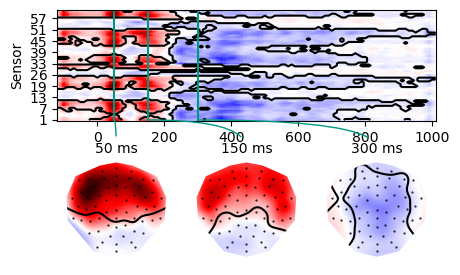

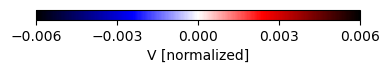

In [10]:
# Load cross-validated preditive power of all models
models = ['envelope', 'envelope+onset', 'acoustic']
n_rowsLIST = []

for model in models:
    for subj in Native_SUBJECTS:
        trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif %s.pickle'%(int(subj[1:3]), int(subj[1:3]), model)))
        n_rowsLIST.append([subj, model, trf.proportion_explained])
model_data = eelbrain.Dataset.from_caselist(['subject', 'model', 'det'], n_rowsLIST)
# For more interpretable numbers, express proportion explained in terms of the maximum explained variability by the full model
index = model_data['model'] == 'acoustic'
model_data['det'] *= 100 / model_data[index, 'det'].mean('case').max('sensor')

# Redo tests with adjusted predictive power 
test_envelope = eelbrain.testnd.TTestOneSample('det', sub="model == 'envelope'", ds=model_data, tail=1, pmin=0.05)
test_acoustic = eelbrain.testnd.TTestOneSample('det', sub="model == 'acoustic'", ds=model_data, tail=1, pmin=0.05)
test_onset_envelope = eelbrain.testnd.TTestRelated('det', 'model', 'envelope+onset', 'envelope', 'subject', ds=model_data, tail=1, pmin=0.05)
test_acoustic_onset = eelbrain.testnd.TTestRelated('det', 'model', 'acoustic', 'envelope+onset', 'subject', ds=model_data, tail=1, pmin=0.05)

t_envelope = [0.050, 0.150, 0.300]# old timepoint = [0.050, 0.100, 0.150, 0.400]
t_onset = [0.060, 0.190] # old timepoint = [0.060, 0.110, 0.180]

#'Envelope TRF'
p7 = eelbrain.plot.TopoArray(trf_envelope, t=t_envelope) 
p7.plot_colorbar(width=0.1) #below=axes[1], **cbar_args, ticks=0, label='TRF (a.u.)')

#'Onset TRF' in envelope+onset
p8 = eelbrain.plot.TopoArray(trf_eo_onset, t=t_onset)
p8.plot_colorbar(width=0.1)
# 'Envelope TRF' in envelope+onset
p9 = eelbrain.plot.TopoArray(trf_eo_envelope, t=t_envelope)
p9.plot_colorbar(width=0.1)

# 'Onset STRF (sum across frequency)'
p10 = eelbrain.plot.TopoArray(trf_onset_spectrogram, t=t_onset)
p10.plot_colorbar(width=0.1)
# 'Envelope STRF (sum across frequency)'
p11 = eelbrain.plot.TopoArray(trf_spectrogram, t=t_envelope)
p11.plot_colorbar(width=0.1)



p7.save(TRF_DIR / 'Natives_Envelope TRF_envelop.png')
p8.save(TRF_DIR / 'Natives_Envelope+onset TRF_Onset TRF.png')
p9.save(TRF_DIR / 'Natives_Envelope+onset TRF_Envelope TRF.png')
p10.save(TRF_DIR / 'Natives_Onset TRF_sum-of-freq.png')
p11.save(TRF_DIR / 'Natives_Envelope TRF_sum-of-freq.png')

## Natives Word-class-acoustics TRFs

##### Pre-define models here to have easier access during estimation. In the future, additional models could be added here and the script re-run to generate additional TRFs.
    models = {
        # Acoustic models
        'envelope': [envelope],
        'envelope+onset': [envelope, onset_envelope],
        'acoustic': [gammatone, gammatone_onsets],
        
        # Models with word-onsets and word-class
        'words': [word_onsets],
        'words+lexical': [word_onsets, word_lexical, word_nlexical],
        'acoustic+words': [gammatone, gammatone_onsets, word_onsets],
        'acoustic+words+lexical': [gammatone, gammatone_onsets, word_onsets, word_lexical, word_nlexical],
        
        # Language Models
        'Ngram': [word_Ngram, word_onsets, word_lexical, word_nlexical],
        'CFG': [word_CFG, word_onsets, word_lexical, word_nlexical],
        'Ngram-CFG_all': [word_Ngram, word_CFG, word_onsets, word_lexical, word_nlexical]
    }
m = covar  
m1 = covar + Ngram  
m2 = covar + CFG  
m3 = covar + Ngram + CFG  

In [3]:
## NATIVES ##

STIMULI = [str(i) for i in range(1, 13)]
DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
EEG_DIR = DATA_ROOT / 'EEG_Natives' / 'Alice_natives_ICAed_fif'
Native_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'S\d*', path.name)]
# Define a target directory for TRF estimates and make sure the directory is created
TRF_DIR = DATA_ROOT / 'TRFs_Natives'
TRF_DIR.mkdir(exist_ok=True)
print(Native_SUBJECTS)

['S13_Alice-natives_sfreq-100_raw.fif', 'S14_Alice-natives_sfreq-100_raw.fif', 'S12_Alice-natives_sfreq-100_raw.fif', 'S15_Alice-natives_sfreq-100_raw.fif', 'S11_Alice-natives_sfreq-100_raw.fif', 'S16_Alice-natives_sfreq-100_raw.fif', 'S17_Alice-natives_sfreq-100_raw.fif', 'S18_Alice-natives_sfreq-100_raw.fif', 'S19_Alice-natives_sfreq-100_raw.fif', 'S20_Alice-natives_sfreq-100_raw.fif', 'S21_Alice-natives_sfreq-100_raw.fif', 'S01_Alice-natives_sfreq-100_raw.fif', 'S03_Alice-natives_sfreq-100_raw.fif', 'S04_Alice-natives_sfreq-100_raw.fif', 'S05_Alice-natives_sfreq-100_raw.fif', 'S06_Alice-natives_sfreq-100_raw.fif', 'S08_Alice-natives_sfreq-100_raw.fif', 'S10_Alice-natives_sfreq-100_raw.fif', 'S22_Alice-natives_sfreq-100_raw.fif', 'S25_Alice-natives_sfreq-100_raw.fif', 'S26_Alice-natives_sfreq-100_raw.fif', 'S34_Alice-natives_sfreq-100_raw.fif', 'S35_Alice-natives_sfreq-100_raw.fif', 'S36_Alice-natives_sfreq-100_raw.fif', 'S37_Alice-natives_sfreq-100_raw.fif', 'S38_Alice-natives_sfreq

<TTestRelated 'det', 'model', 'words+lexical', 'words', 'subject' (n=33), tail=1, samples=10000, pmin=0.05, 1 clusters, p < .001>
id   n_sensors   v        p        sig
--------------------------------------
1    28          68.147   0.0009   ***


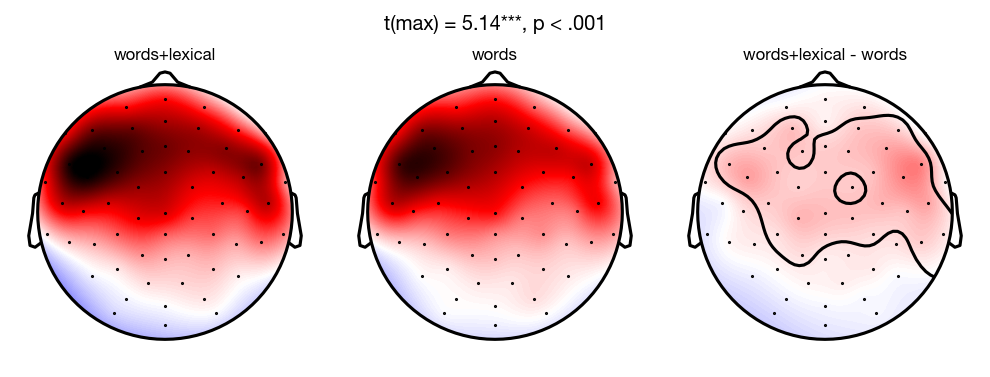

In [17]:
DST = TRF_DIR / 'Natives_figures'
DST.mkdir(exist_ok=True)

# # Do brain responses differ between word class?
# Test whether adding predcitors that distinguish function and content words improves the predictive power of the TRF models.

# Load predictive power of all models
models = ['words', 'words+lexical', 'acoustic+words', 'acoustic+words+lexical']
rows = []
for model in models:
    for subject in Native_SUBJECTS:
        trf = eelbrain.load.unpickle(TRF_DIR / subject / f'{subject} {model}.pickle')
        rows.append([subject, model, trf.proportion_explained])
model_data = eelbrain.Dataset.from_caselist(['subject', 'model', 'det'], rows)
# For more interpretable numbers, express proportion explained in terms of the maximum explained variability of the most complete model
index = model_data['model'] == 'acoustic+words+lexical'
model_data['det'] *= 100 / model_data[index, 'det'].mean('case').max('sensor')
lexical_model_test = eelbrain.testnd.TTestRelated('det', 'model', 'words+lexical', 'words', match='subject', ds=model_data, tail=1, pmin=0.05)
print(lexical_model_test)
ttrelated_clus = lexical_model_test.find_clusters(0.05)
print(ttrelated_clus)
p12 = eelbrain.plot.Topomap(lexical_model_test, ncol=3, title=lexical_model_test, axh=2, clip='circle')
p12.save(DST / 'Natives_acoustic+words+lexical_TRF.png')

<TTestRelated 'non_lexical', 'lexical' (n=33), samples=10000, pmin=0.1, 76 clusters, p < .001>
id   n_sensors   tstart   tstop   duration   v        p   sig
-------------------------------------------------------------
1    58          0.06     0.98    0.92       4974.6   0   ***


"\np16.save(DST / 'Natives_acoustic+words+lexical_TRF.png')\np17.save(DST / 'Natives_acoustic+words+lexical_TRF.png')\n"

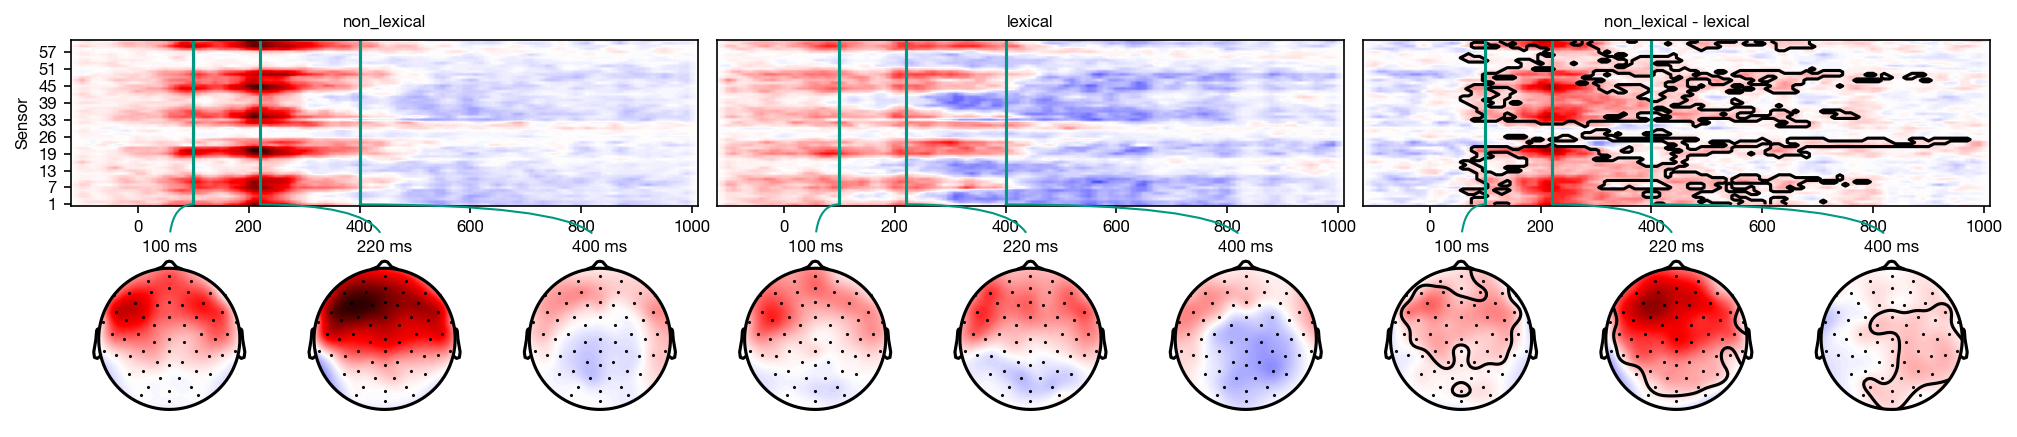

In [18]:
# ## How do the responses differ?
# Compare the TRFs corresponding to content and function words.

# Load the TRFs:
# Keep `h_scaled` instead of `h` so that we can compare and add TRFs to different predictors
# Because each predictor gets normalized for estimation, the scale of the TRFs in `h` are all different
# The `h_scaled` attribute reverses that normalization, so that the TRFs are all in a common scale
rows = []
for subject in Native_SUBJECTS:
    trf = eelbrain.load.unpickle(TRF_DIR / subject / f'{subject} words+lexical.pickle')
    rows.append([subject, model, *trf.h_scaled])
trfs = eelbrain.Dataset.from_caselist(['subject', 'model', *trf.x], rows)

# Each word has an impulse of the general word predictor, as well as one form the word-class specific predictor
# Accordingly, each word's response consists of the general word TRF and the word-class specific TRF
# To reconstruct the responses to the two kinds of words, we thus want to add the general word TRF and the word-class specific TRF:
word_difference = eelbrain.testnd.TTestRelated('non_lexical + word', 'lexical + word', ds=trfs, pmin=0.1)
print(word_difference)
p13 = eelbrain.plot.TopoArray(word_difference, t=[0.100, 0.220, 0.400], clip='circle')
ttrelated_clus2 = word_difference.find_clusters(0.1)
print(ttrelated_clus2)
# ## When controlling for auditory responses?
# Do the same test, but include predictors controlling for responses to acoustic features in both models

#lexical_acoustic_model_test = eelbrain.testnd.TTestRelated('det', 'model', 'acoustic+words+lexical', 'acoustic+words', match='subject', ds=model_data, tail=1, pmin=0.05)
#p14 = eelbrain.plot.Topomap(lexical_acoustic_model_test, ncol=3, title=lexical_acoustic_model_test)

# ## Acoustic responses?
# Do acoustic predictors have predictive power in the area that's affected?

#acoustic_model_test = eelbrain.testnd.TTestRelated('det', 'model', 'acoustic+words', 'words', match='subject', ds=model_data, tail=1, pmin=0.05)
#p15 = eelbrain.plot.Topomap(acoustic_model_test, ncol=3, title=acoustic_model_test)

"""
# # Analyze spectrogram by word class
# If auditory responses can explain the difference in response to function and content words, then that suggests that acoustic properties differ between function and content words. We can analyze this directly with TRFs. 

trf_word = eelbrain.load.unpickle(TRF_DIR / 'gammatone~word.pickle')
trf_lexical = eelbrain.load.unpickle(TRF_DIR / 'gammatone~word+lexical.pickle')

# Test whether information about the lexical status of the words improves prediction of the acoustic signal. 

ds_word = trf_word.partition_result_data()
ds_lexical = trf_lexical.partition_result_data()

# Test and plot predictive power difference
res = eelbrain.testnd.TTestRelated(ds_lexical['det'], ds_word['det'], tail=1)
ds_word[:, 'model'] = 'word'
ds_lexical[:, 'model'] = 'word+lexical'
ds = eelbrain.combine([ds_word, ds_lexical], incomplete='drop')
p16 = eelbrain.plot.UTSStat('det', 'model', match='i_test', ds=ds, title=res, h=2)

# For a univariate test, average across frequency
eelbrain.test.TTestRelated("det.mean('frequency')", 'model', match='i_test', ds=ds)

# Compare TRFs
word_acoustics_difference = eelbrain.testnd.TTestRelated('word + non_lexical', 'word + lexical', ds=ds_lexical)
p17 = eelbrain.plot.Array(word_acoustics_difference, ncol=3, h=2)
"""

p13.save(DST / 'Natives_Islexical_TRF.png')
#p14.save(DST / 'Natives_acoustic_Islexical_words_TRFs.png')
#p15.save(DST / 'Natives_acoustic_words_TRF.png')
"""
p16.save(DST / 'Natives_acoustic+words+lexical_TRF.png')
p17.save(DST / 'Natives_acoustic+words+lexical_TRF.png')
"""

NameError: name 'word_acoustics_difference' is not defined

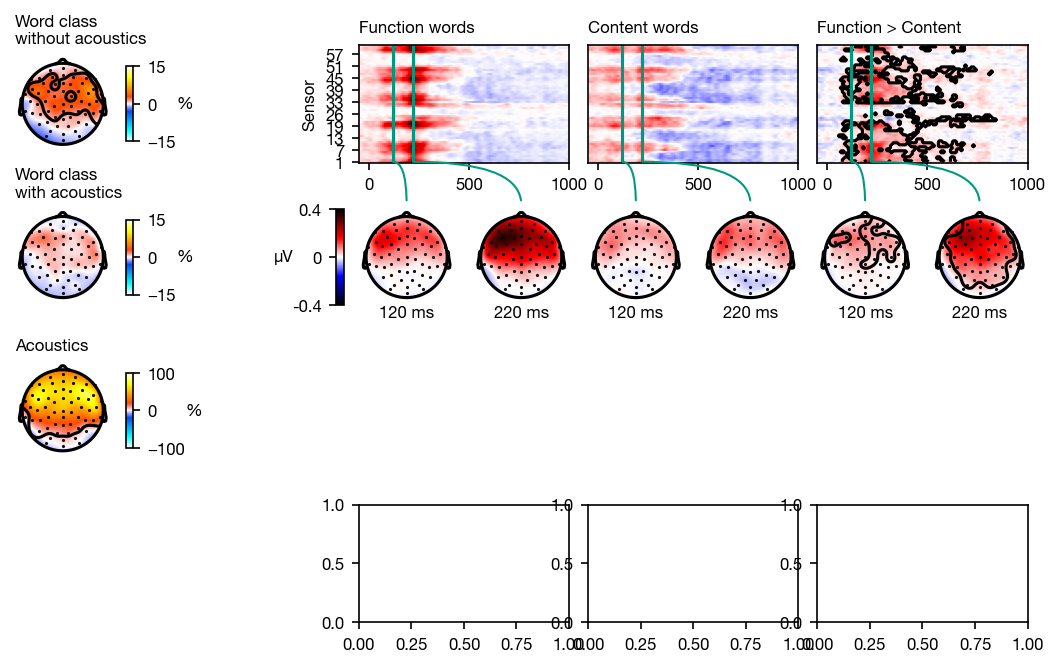

In [17]:
# # (Didn't use it)Generate figure

# +
# Initialize figure
figure = pyplot.figure(figsize=(7.5, 5))
gridspec = figure.add_gridspec(4, 9, height_ratios=[2,2,2,2], left=0.05, right=0.95, hspace=0.3)
topo_args = dict(clip='circle')
det_args = dict(**topo_args, vmax=15, cmap='lux-a')
cbar_args = dict(label='%', ticks=3, h=.5)

# Add predictive power tests
axes = figure.add_subplot(gridspec[0,0])
p = eelbrain.plot.Topomap(lexical_model_test.masked_difference(), axes=axes, **det_args)
axes.set_title("Word class\nwithout acoustics", loc='left')
p.plot_colorbar(right_of=axes, **cbar_args)

axes = figure.add_subplot(gridspec[1,0])
p = eelbrain.plot.Topomap(lexical_acoustic_model_test.masked_difference(), axes=axes, **det_args)
axes.set_title("Word class\nwith acoustics", loc='left')
p.plot_colorbar(right_of=axes, **cbar_args)

det_args['vmax'] = 100
axes = figure.add_subplot(gridspec[2,0])
p = eelbrain.plot.Topomap(acoustic_model_test.masked_difference(), axes=axes, **det_args)
axes.set_title("Acoustics", loc='left')
p.plot_colorbar(right_of=axes, **cbar_args)

# Add TRFs
axes = [
    figure.add_subplot(gridspec[0,3:5]), 
    figure.add_subplot(gridspec[1,3]), 
    figure.add_subplot(gridspec[1,4]),
    figure.add_subplot(gridspec[0,5:7]), 
    figure.add_subplot(gridspec[1,5]), 
    figure.add_subplot(gridspec[1,6]),
    figure.add_subplot(gridspec[0,7:9]), 
    figure.add_subplot(gridspec[1,7]), 
    figure.add_subplot(gridspec[1,8]),
]
p = eelbrain.plot.TopoArray(word_difference, t=[0.120, 0.220], axes=axes, axtitle=False, **topo_args, xlim=(-0.050, 1.00), topo_labels='below')
axes[0].set_title('Function words', loc='left')
axes[3].set_title('Content words', loc='left')
axes[6].set_title('Function > Content', loc='left')
p.plot_colorbar(left_of=axes[1], ticks=3)

# Add acoustic patterns
axes = [
    figure.add_subplot(gridspec[3,3:5]), 
    figure.add_subplot(gridspec[3,5:7]), 
    figure.add_subplot(gridspec[3,7:9]), 
]
plots = [word_acoustics_difference.c1_mean, word_acoustics_difference.c0_mean, word_acoustics_difference.difference]
p = eelbrain.plot.Array(plots, axes=axes, axtitle=False)
axes[0].set_title('Function', loc='left')
axes[1].set_title('Content', loc='left')
axes[2].set_title('Function > Content', loc='left')
# Add a line to highlight difference
for ax in axes:
    ax.axvline(0.070, color='k', alpha=0.5, linestyle=':')

figure.text(0.01, 0.96, 'A) Predictive power', size=10)
figure.text(0.27, 0.96, 'B) Word class TRFs (without acoustics)', size=10)
figure.text(0.27, 0.37, 'C) Spectrogram by word class', size=10)

figure.savefig(DST / 'Word-class-acoustics.pdf')
figure.savefig(DST / 'Word-class-acoustics.png')

## Natives POS-Models TRFs

##### Pre-define models here to have easier access during estimation. In the future, additional models could be added here and the script re-run to generate additional TRFs.
    models = {
        # Acoustic models
        'envelope': [envelope],
        'envelope+onset': [envelope, onset_envelope],
        'acoustic': [gammatone, gammatone_onsets],
        
        # Models with word-onsets and word-class
        'words': [word_onsets],
        'words+lexical': [word_onsets, word_lexical, word_nlexical],
        'acoustic+words': [gammatone, gammatone_onsets, word_onsets],
        'acoustic+words+lexical': [gammatone, gammatone_onsets, word_onsets, word_lexical, word_nlexical],
        
        # Language Models
        'Ngram': [word_Ngram, word_onsets, word_lexical, word_nlexical],
        'CFG': [word_CFG, word_onsets, word_lexical, word_nlexical],
        'Ngram-CFG_all': [word_Ngram, word_CFG, word_onsets, word_lexical, word_nlexical]
    }
m = covar  
m1 = covar + Ngram  
m2 = covar + CFG  
m3 = covar + Ngram + CFG  

In [3]:
## NATIVES ##

STIMULI = [str(i) for i in range(1, 13)]
DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
EEG_DIR = DATA_ROOT / 'EEG_Natives' / 'Alice_natives_ICAed_fif'
Native_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'S\d*', path.name)]
# Define a target directory for TRF estimates and make sure the directory is created
TRF_DIR = DATA_ROOT / 'TRFs_Natives'
TRF_DIR.mkdir(exist_ok=True)
print(Native_SUBJECTS)

['S13_Alice-natives_sfreq-100_raw.fif', 'S14_Alice-natives_sfreq-100_raw.fif', 'S12_Alice-natives_sfreq-100_raw.fif', 'S15_Alice-natives_sfreq-100_raw.fif', 'S11_Alice-natives_sfreq-100_raw.fif', 'S16_Alice-natives_sfreq-100_raw.fif', 'S17_Alice-natives_sfreq-100_raw.fif', 'S18_Alice-natives_sfreq-100_raw.fif', 'S19_Alice-natives_sfreq-100_raw.fif', 'S20_Alice-natives_sfreq-100_raw.fif', 'S21_Alice-natives_sfreq-100_raw.fif', 'S01_Alice-natives_sfreq-100_raw.fif', 'S03_Alice-natives_sfreq-100_raw.fif', 'S04_Alice-natives_sfreq-100_raw.fif', 'S05_Alice-natives_sfreq-100_raw.fif', 'S06_Alice-natives_sfreq-100_raw.fif', 'S08_Alice-natives_sfreq-100_raw.fif', 'S10_Alice-natives_sfreq-100_raw.fif', 'S22_Alice-natives_sfreq-100_raw.fif', 'S25_Alice-natives_sfreq-100_raw.fif', 'S26_Alice-natives_sfreq-100_raw.fif', 'S34_Alice-natives_sfreq-100_raw.fif', 'S35_Alice-natives_sfreq-100_raw.fif', 'S36_Alice-natives_sfreq-100_raw.fif', 'S37_Alice-natives_sfreq-100_raw.fif', 'S38_Alice-natives_sfreq

In [ ]:
models = ['envelope', 'envelope+onset', 'acoustic', 'words', 'words+lexical', 'acoustic+words', 'acoustic+words+lexical']

for subj in subject:
    trf = eelbrain.load.unpickle(TRF_DIR / subject / f'{subject} {model}.pickle')
    eelbrain.save.pickle(trf, path)

In [6]:
DST = TRF_DIR / 'Natives_figures'
DST.mkdir(exist_ok=True)

# # Do brain responses differ between word class?
# Test whether adding predcitors that distinguish function and content words improves the predictive power of the TRF models.

# Load predictive power of all models
models = ['words', 'Ngram', 'CFG', 'Ngram-CFG_all']
rows = []
for model in models:
    for subject in Native_SUBJECTS:
        if 'Ngram' in subject:
            trf = eelbrain.load.unpickle(TRF_DIR / subject / f'{subject[0:3]} {model}.pickle')
            rows.append([subject, model, trf.proportion_explained])
        else:
            trf = eelbrain.load.unpickle(TRF_DIR / subject / f'{subject} {model}.pickle')
            rows.append([subject, model, trf.proportion_explained])
model_data = eelbrain.Dataset.from_caselist(['subject', 'model', 'det'], rows)
# For more interpretable numbers, express proportion explained in terms of the maximum explained variability of the most complete model
index = model_data['model'] == 'Ngram-CFG_all'
model_data['det'] *= 100 / model_data[index, 'det'].mean('case').max('sensor')
lexical_model_test = eelbrain.testnd.TTestRelated('det', 'model', 'Ngram', 'words', match='subject', ds=model_data, tail=1, pmin=0.05)
print(lexical_model_test)
ttrelated_clus = lexical_model_test.find_clusters(0.05)
print(ttrelated_clus)
p18 = eelbrain.plot.Topomap(lexical_model_test, ncol=3, title=lexical_model_test, axh=2, clip='circle')
#p18.save(DST / 'Natives_acoustic+words+lexical_TRF.png')

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S13_Alice-natives_sfreq-100_raw.fif/S13_Alice-natives_sfreq-100_raw.fif Ngram.pickle'

In [ ]:
# ## How do the responses differ?
# Compare the TRFs corresponding to content and function words.

# Load the TRFs:
# Keep `h_scaled` instead of `h` so that we can compare and add TRFs to different predictors
# Because each predictor gets normalized for estimation, the scale of the TRFs in `h` are all different
# The `h_scaled` attribute reverses that normalization, so that the TRFs are all in a common scale
rows = []
for subject in Native_SUBJECTS:
    trf = eelbrain.load.unpickle(TRF_DIR / subject / f'{subject} words+lexical.pickle')
    rows.append([subject, model, *trf.h_scaled])
trfs = eelbrain.Dataset.from_caselist(['subject', 'model', *trf.x], rows)

# Each word has an impulse of the general word predictor, as well as one form the word-class specific predictor
# Accordingly, each word's response consists of the general word TRF and the word-class specific TRF
# To reconstruct the responses to the two kinds of words, we thus want to add the general word TRF and the word-class specific TRF:
word_difference = eelbrain.testnd.TTestRelated('non_lexical + word', 'lexical + word', ds=trfs, pmin=0.1)
print(word_difference)
p19 = eelbrain.plot.TopoArray(word_difference, t=[0.100, 0.220, 0.400], clip='circle')
ttrelated_clus2 = word_difference.find_clusters(0.1)
print(ttrelated_clus2)
# ## When controlling for auditory responses?
# Do the same test, but include predictors controlling for responses to acoustic features in both models

#lexical_acoustic_model_test = eelbrain.testnd.TTestRelated('det', 'model', 'acoustic+words+lexical', 'acoustic+words', match='subject', ds=model_data, tail=1, pmin=0.05)
#p20 = eelbrain.plot.Topomap(lexical_acoustic_model_test, ncol=3, title=lexical_acoustic_model_test)

# ## Acoustic responses?
# Do acoustic predictors have predictive power in the area that's affected?

#acoustic_model_test = eelbrain.testnd.TTestRelated('det', 'model', 'acoustic+words', 'words', match='subject', ds=model_data, tail=1, pmin=0.05)
#p21 = eelbrain.plot.Topomap(acoustic_model_test, ncol=3, title=acoustic_model_test)

"""
# # Analyze spectrogram by word class
# If auditory responses can explain the difference in response to function and content words, then that suggests that acoustic properties differ between function and content words. We can analyze this directly with TRFs. 

trf_word = eelbrain.load.unpickle(TRF_DIR / 'gammatone~word.pickle')
trf_lexical = eelbrain.load.unpickle(TRF_DIR / 'gammatone~word+lexical.pickle')

# Test whether information about the lexical status of the words improves prediction of the acoustic signal. 

ds_word = trf_word.partition_result_data()
ds_lexical = trf_lexical.partition_result_data()

# Test and plot predictive power difference
res = eelbrain.testnd.TTestRelated(ds_lexical['det'], ds_word['det'], tail=1)
ds_word[:, 'model'] = 'word'
ds_lexical[:, 'model'] = 'word+lexical'
ds = eelbrain.combine([ds_word, ds_lexical], incomplete='drop')
p22 = eelbrain.plot.UTSStat('det', 'model', match='i_test', ds=ds, title=res, h=2)

# For a univariate test, average across frequency
eelbrain.test.TTestRelated("det.mean('frequency')", 'model', match='i_test', ds=ds)

# Compare TRFs
word_acoustics_difference = eelbrain.testnd.TTestRelated('word + non_lexical', 'word + lexical', ds=ds_lexical)
p23 = eelbrain.plot.Array(word_acoustics_difference, ncol=3, h=2)
"""

p19.save(DST / 'Natives_Islexical_TRF.png')
#p20.save(DST / 'Natives_acoustic_Islexical_words_TRFs.png')
#p21.save(DST / 'Natives_acoustic_words_TRF.png')
"""
p22.save(DST / 'Natives_acoustic+words+lexical_TRF.png')
p23.save(DST / 'Natives_acoustic+words+lexical_TRF.png')
"""